In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import time
from sklearn import neighbors 
from vast.voidfinder.voidfinder_functions import not_in_mask
import pickle

In [2]:
mask_file_name = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_main_mask.pickle"

In [3]:
temp_infile = open(mask_file_name, "rb")
mask, mask_resolution = pickle.load(temp_infile)
temp_infile.close()

In [4]:
file_name1 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_holes.txt"

In [5]:
data_table_KIAS = Table.read(file_name1, format = "ascii.commented_header")

In [6]:
file_name2 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_maximal.txt"

In [7]:
data_table_MPA_max = Table.read(file_name2, format = "ascii.commented_header")

In [8]:
file_name3 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_LOWZ_comoving_holes.txt"

In [9]:
data_table_LOWZ = Table.read(file_name3, format = "ascii.commented_header")

In [10]:
file_name4 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_LOWZ_comoving_maximal.txt"

In [11]:
data_table_LOWZ_max = Table.read(file_name4, format = "ascii.commented_header")

In [12]:
data_table_MPA_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-219.9766885730029,55.94592863332258,135.83440145223284,21.95110162006994,0,264.519706381349,165.73067997975286,30.898137131105038
-262.97301589081854,-78.0620428087949,123.10641360359631,21.876257045873633,1,300.67204506660505,196.53322173210324,24.169504987853816
-209.2393054610766,-128.41862226940606,146.04767844766113,21.676996619726033,2,285.6612572179811,211.5391234240106,30.74791185165335
-233.6904384725772,112.45201691586905,106.65059297778195,21.269610821890087,3,280.4122431786187,154.30310477089623,22.354435414074697
-203.0956581165485,167.38486809752138,104.66285488783322,21.12429049841356,4,283.23109576296565,140.50575729206452,21.686735992041417
-164.4736258947223,-14.868764797054645,11.03921163979978,20.84360377724462,5,165.51289368256323,185.16561850710912,3.8242949431463615
-148.11476378155703,74.19692539372802,106.5660039111301,20.74034620068459,6,196.97583653213883,153.39178099729378,32.75245728606484
-161.60334916133954,95.9151905156753,237.93966516032103,20.48709350738816,7,303.2006769260679,149.30992441324952,51.69845674463693
-76.75901854682142,43.96911013189496,166.36715334524033,20.35402581850751,8,188.4230858633323,150.19505073037172,61.9996393863015


In [13]:
data_table_KIAS

x,y,z,radius,flag
float64,float64,float64,float64,int64
-133.75116962204893,49.173477280484086,270.19872739901473,23.02496784982688,0
-134.41648918898383,49.80191523472565,270.3543155988628,22.977833782535924,0
-131.02815447556276,48.046644793393035,272.55714060868485,22.96777355187413,0
-131.7480923011386,48.30576810786393,271.8531883218867,22.93518314947202,0
-135.2821088478816,50.979598715933676,271.30293552134503,22.86280134167585,0
-135.10067522671858,50.936032272639096,271.52538773215906,22.821204910294483,0
-128.57544368618264,45.77801170500754,274.7046795198888,22.79467985828839,0
-135.48044853669685,51.32429881798266,271.457432648458,22.788934068968818,0
-127.9793208430708,45.58263246807619,275.0130211441492,22.76161141779093,0


In [14]:
data_table_LOWZ

x,y,z,radius,flag
float64,float64,float64,float64,int64
-257.29631137458625,-75.11564676740926,134.8332052410881,27.530064533128623,0
-262.4828168801113,-72.48103953015082,118.62252352011068,26.49771835502426,0
-262.5005935363379,-72.33954195961113,118.49537527114241,26.418705120119398,0
-227.30844177318664,55.90921010386288,139.21868311260044,26.291998860426123,1
-227.2835262732506,54.942887898633465,138.04528249083072,26.247561426558537,1
-260.2524169207296,-71.7028755186181,119.24788936683028,26.20391520253436,0
-263.434996162542,-73.32753704306099,117.8585756187685,26.201312116990973,0
-263.6305074322646,-73.5611166050323,118.07500103757998,26.14973402757511,0
-202.70306846900263,-128.78146198911642,142.6527112527934,26.136994526190758,2


In [15]:
data_table_LOWZ_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-257.29631137458625,-75.11564676740926,134.8332052410881,27.530064533128623,0,300.03957317633893,196.27475192646298,26.70421628517436
-227.30844177318664,55.90921010386288,139.21868311260044,26.291998860426123,1,272.3541980645768,166.18172034885725,30.741644448244994
-202.70306846900263,-128.78146198911642,142.6527112527934,26.136994526190758,2,279.3259653998823,212.42864142769088,30.710692083960637
-264.3938296504095,-55.125959840731674,93.86255213674605,25.998510509300054,3,285.92507287608595,191.7774087907294,19.16421423896934
-223.62586643236756,15.439409713248137,152.98677876260479,25.486157442735664,4,271.3887580318662,176.05049507400022,34.31332722447477
-146.29228173374884,-95.28164267698646,213.60680500632495,24.959173603989342,5,275.8765852171975,213.0766050358768,50.74015571186097
-201.83575571590526,163.0674467201877,111.85236538501563,23.95376383905574,6,282.5590488862016,141.06451002416244,23.31929853570458
-235.9819865140225,129.67069801907775,63.392211224858315,23.882398611483787,7,276.62349923286746,151.21146719055247,13.247871482937375
-158.5935175431125,95.05502944746921,235.0000905430129,23.451992289839986,8,299.0190712733571,149.063102494117,51.804304670114085


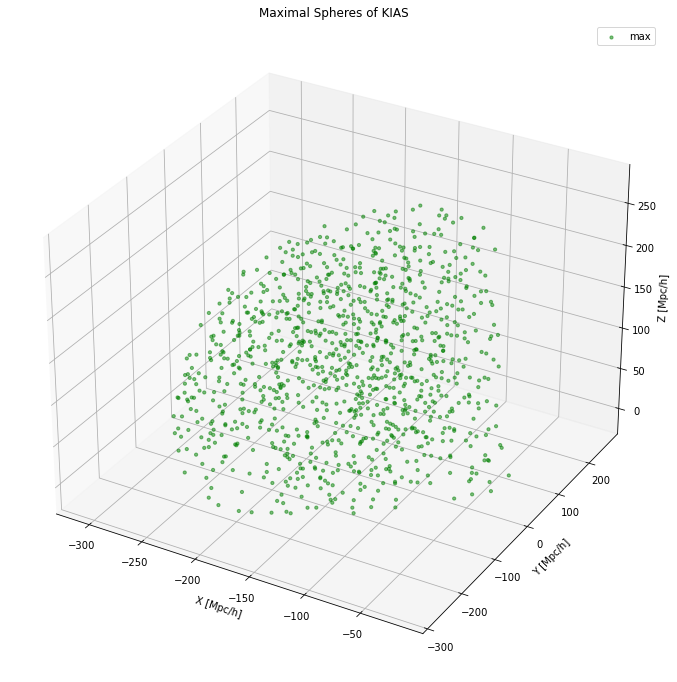

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_MPA_max['x'],data_table_MPA_max['y'], data_table_MPA_max['z'],
           color = 'green', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Maximal Spheres of KIAS");

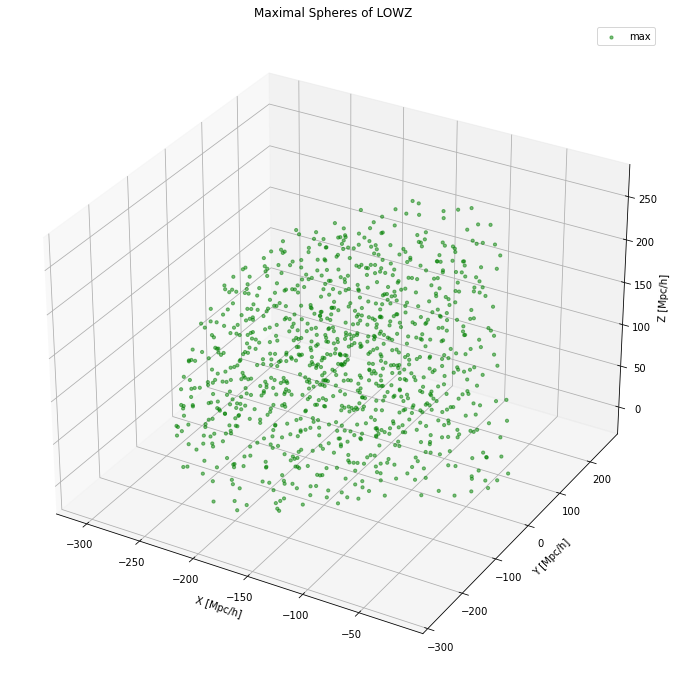

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_LOWZ_max['x'],data_table_LOWZ_max['y'], data_table_LOWZ_max['z'],
           color = 'green', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Maximal Spheres of LOWZ");

In [18]:
# # p_size = 100
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(data_table_MPA_holes['x'],data_table_MPA_holes['y'], data_table_MPA_holes['z'],
#            color = 'black', s=0.1, alpha=0.5,
#            label='holes')
# ax.scatter(data_table_MPA_max['x'],data_table_MPA_max['y'], data_table_MPA_max['z'],
#            color = 'purple', s=10, alpha=0.5,
#            label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

# ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of KIAS");

In [19]:
# # p_size = 100
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(data_table_LOWZ_holes['x'],data_table_LOWZ_holes['y'], data_table_LOWZ_holes['z'],
#            color = 'black', s=0.1, alpha=0.5,
#            label='holes')
# ax.scatter(data_table_LOWZ_max['x'],data_table_LOWZ_max['y'], data_table_LOWZ_max['z'],
#            color = 'purple', s=10, alpha=0.5,
#            label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

# ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of LOWZ");

In [20]:
def calc_volume_boundaries(void_cat_A, void_cat_B):
    """Compute the boundaries of the minimal rectangular volume (parallelpiped)
    that completely contains two void catalogs.
    
    Parameters
    ----------
    void_cat_A : astropy.Table
        Table of void data from first catalog.
    void_cat_B : astropy.Table
        Table of void data from second catalog.
        
    Returns
    -------
    x_min : float
    x_max : float
    y_min : float
    y_max : float
    z_min : float
    z_max : float
    """
    x_min = np.minimum(np.min(void_cat_A['x']), np.min(void_cat_B['x']))
    x_max = np.maximum(np.max(void_cat_A['x']), np.max(void_cat_B['x']))
    
    y_min = np.minimum(np.min(void_cat_A['y']), np.min(void_cat_B['y']))
    y_max = np.maximum(np.max(void_cat_A['y']), np.max(void_cat_B['y']))

    z_min = np.minimum(np.min(void_cat_A['z']), np.min(void_cat_B['z']))
    z_max = np.maximum(np.max(void_cat_A['z']), np.max(void_cat_B['z']))

    return x_min, x_max, y_min, y_max, z_min, z_max

def generate_grid_points(x_min, x_max, y_min, y_max, z_min, z_max):
    """Creates a dense rectangular grid of points in 3D for the void volume calculation.
    
    Returns
    -------
    xyz : list
        2D list of points in 3D space.
    """
    x_range = np.arange(x_min, x_max)
    y_range = np.arange(y_min, y_max)
    z_range = np.arange(z_min, z_max)

    # Creating a meshgrid from the ranges to 
    X,Y,Z = np.meshgrid(x_range,y_range,z_range)

    x_points = np.ravel(X)
    y_points = np.ravel(Y)
    z_points = np.ravel(Z)
    
    point_coords = np.array([x_points, y_points, z_points])
    
    return point_coords

In [21]:
#This line creates the boundaries (like the whole min and max)
xmin, xmax, ymin, ymax, zmin, zmax = calc_volume_boundaries(data_table_MPA_max, data_table_LOWZ_max)

#This line makes creates the points in between 
pts = generate_grid_points(xmin, xmax, ymin, ymax, zmin, zmax)

b = pts.shape
print(b)

(3, 45368640)


In [22]:
# This is the cell to filter out all the points that we do not want 🥴
start_time = time.time()

rmin = 0
rmax = 312.89816

points_boolean = np.ones(pts.shape[1], dtype = bool)

print(time.time() - start_time)

start_time = time.time()
for i in range(pts.shape[1]):
    
    #   print(pts[:,i].reshape((1,3)).shape)
    #   print(pts[:,i].reshape((1,3)))
    #   print(pts[:,i])
    points_boolean[i] = not_in_mask(pts[:,i].reshape((1,3)), mask, mask_resolution, rmin, rmax)        


points_in_mask = pts[:,~points_boolean]
(var, n_points) = points_in_mask.shape
print(time.time() - start_time)
print(points_in_mask.shape)
print(np.sum(points_boolean))
print(np.sum(~points_boolean))
print(points_boolean.shape)

0.01905989646911621
416.7789828777313
(3, 22843215)
22525425
22843215
(45368640,)


In [23]:
# # should give me my good cone shape
# start_time = time.time()
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(points_in_mask[0,:],points_in_mask[1,:], points_in_mask[2,:],
#            color = 'blue', s=10, alpha=0.5,
#            label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

# plt.title("Points in Mask");
# print(time.time() - start_time)

In [24]:
def point_query(point_coords, void_cat):
    """We are creating a function to make a KDTree to find the number of points in 
    and out of a catalogue.
    
    Parameters
    ----------
    point_coords: ndarray has a shape of (3,N)
        This is the list of points to query the given void catalogue. N is the number of points given. 
    void_cat: Astropy Table
        This is the given void catalogue.
    
    Returns
    -------
    true_inside: ndarray of shape (N,1)
        Is this the boolean array of length N (same length as point_coords). True means that 1 point 
        is inside the hole.
    """
    
    cx = void_cat['x']
    cy = void_cat['y']
    cz = void_cat['z']

    sphere_coords = np.array([cx, cy, cz])

    start_time = time.time()

    #The .T is meant to transpose the array from (3,1054) to (1054,3)
    sphere_tree = neighbors.KDTree(sphere_coords.T)

    print(time.time() - start_time)

    start_time = time.time()

    dist, idx = sphere_tree.query(point_coords.T, k = 1)

    true_inside = dist < void_cat['radius'][idx]
    
    return true_inside

In [25]:
start_time = time.time()

U = 21

count_in_KIAS = np.zeros(U)
count_out_KIAS = np.zeros(U)

count_in_LOWZ = np.zeros(U)
count_out_LOWZ = np.zeros(U)

inside_both = np.zeros(U)
inside_neither = np.zeros(U)
inside_a = np.zeros(U)
inside_b = np.zeros(U)

points_in_mask_copy = points_in_mask.copy()

for i in range(U):
        
    delta = np.random.rand(3)
    
    points_in_mask_copy[0] = points_in_mask[0] + delta[0]
    points_in_mask_copy[1] = points_in_mask[1] + delta[1]
    points_in_mask_copy[2] = points_in_mask[2] + delta[2]
    
    true_inside_KIAS = point_query(points_in_mask_copy, data_table_KIAS)

    count_in_KIAS[i] = np.sum(true_inside_KIAS)

    # The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
    count_out_KIAS[i] = np.sum(~true_inside_KIAS)
    
    # print(time.time() - start_time)

    # total_KIAS = count_in_KIAS + count_out_KIAS

    true_inside_LOWZ = point_query(points_in_mask_copy, data_table_LOWZ)

    count_in_LOWZ[i] = np.sum(true_inside_LOWZ)

    # The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
    count_out_LOWZ[i] = np.sum(~true_inside_LOWZ)

    #total_DEL = count_in_DEL + count_out_DEL
    
    # This is the number of points that are inside both A and B
    inside_A_and_B = np.logical_and(true_inside_KIAS, true_inside_LOWZ)
    inside_both[i] = np.sum(inside_A_and_B)
    
    # This is the number of points that are in neither A and B
    not_inside_A_and_B = np.logical_and(~true_inside_KIAS, ~true_inside_LOWZ)
    inside_neither[i] = np.sum(not_inside_A_and_B)
    
    # This is the number of points that are in A but not B
    inside_A = np.logical_and(true_inside_KIAS, ~true_inside_LOWZ)
    inside_a[i] = np.sum(inside_A)
    
    # This is the number of points that are not in A but are in B
    inside_B = np.logical_and(~true_inside_KIAS, true_inside_LOWZ)
    inside_b[i] = np.sum(inside_B)
    
print(time.time() - start_time)
print('\nNumber of points inside KIAS:', count_in_KIAS)
print('\nNumber of points outside KIAS:', count_out_KIAS)
print('\nNumber of points inside Delaunay:', count_in_LOWZ)
print('\nNumber of points outside Delaunay:', count_out_LOWZ)
print("\nThis is the total number of points: {}".format(n_points))
# print("\nThis is the total number of points in Delaunay: {}".format(total_DEL))

0.023802757263183594
0.010390043258666992
0.012757062911987305
0.013027667999267578
0.017287254333496094
0.00861978530883789
0.020659923553466797
0.009977102279663086
0.01780414581298828
0.012846946716308594
0.020573854446411133
0.008727073669433594
0.017766952514648438
0.011538028717041016
0.017637968063354492
0.011243104934692383
0.017617225646972656
0.010647773742675781
0.01771402359008789
0.008808374404907227
0.018722057342529297
0.00869894027709961
0.019451141357421875
0.008695125579833984
0.017332077026367188
0.010036945343017578
0.017447233200073242
0.011588096618652344
0.017300844192504883
0.009808778762817383
0.017566919326782227
0.010563135147094727
0.0175321102142334
0.011303901672363281
0.01768660545349121
0.010149717330932617
0.017640113830566406
0.008639812469482422
0.017654895782470703
0.008527040481567383
0.01758599281311035
0.010660171508789062
1924.3965780735016

Number of points inside KIAS: [14140241. 14157921. 14164927. 14148209. 14182200. 14128273. 14158270.
 1417

## This is the number of points that are inside both A and B

In [26]:
inside_A_and_B = np.logical_and(true_inside_KIAS, true_inside_LOWZ)

np.sum(inside_A_and_B), count_in_KIAS, count_in_LOWZ

(11414709,
 array([14140241., 14157921., 14164927., 14148209., 14182200., 14128273.,
        14158270., 14177265., 14113683., 14166267., 14127743., 14161351.,
        14166791., 14144310., 14139583., 14113595., 14165898., 14188539.,
        14158155., 14167895., 14123927.]),
 array([14742289., 14758220., 14769109., 14754228., 14788130., 14732089.,
        14767891., 14798660., 14719710., 14782449., 14737482., 14770820.,
        14769705., 14758658., 14749093., 14718481., 14780713., 14801085.,
        14762269., 14776073., 14726728.]))

## This is the number of points that are in neither A and B

In [27]:
not_inside_A_and_B = np.logical_and(~true_inside_KIAS, ~true_inside_LOWZ)

np.sum(not_inside_A_and_B), count_in_KIAS, count_in_LOWZ

(5407269,
 array([14140241., 14157921., 14164927., 14148209., 14182200., 14128273.,
        14158270., 14177265., 14113683., 14166267., 14127743., 14161351.,
        14166791., 14144310., 14139583., 14113595., 14165898., 14188539.,
        14158155., 14167895., 14123927.]),
 array([14742289., 14758220., 14769109., 14754228., 14788130., 14732089.,
        14767891., 14798660., 14719710., 14782449., 14737482., 14770820.,
        14769705., 14758658., 14749093., 14718481., 14780713., 14801085.,
        14762269., 14776073., 14726728.]))

## This is the number of points that are in A but not B

In [28]:
inside_A = np.logical_and(true_inside_KIAS, ~true_inside_LOWZ)

np.sum(inside_A)

2709218

## This is the number of points that are not in A but are in B

In [29]:
inside_B = np.logical_and(~true_inside_KIAS, true_inside_LOWZ)

np.sum(inside_B)

3312019

# Fraction of points: Calculate the ratios of the given sums

- in A
- in B
- in A & B
- in neither A nor B
- {in A, not B
- {in B, not A
-   |
-   |
- \ /
- The closer they are to zero, the more similar they are

## This is the ratio of A

In [30]:
r_A = count_in_KIAS / n_points
print(r_A)

[0.61901274 0.61978671 0.62009341 0.61936155 0.62084956 0.61848882
 0.61980198 0.62063352 0.61785011 0.62015207 0.61846561 0.61993686
 0.62017501 0.61919086 0.61898393 0.61784626 0.62013591 0.62112706
 0.61979695 0.62022334 0.61829856]


## This is the ratio of B

In [31]:
r_B = count_in_LOWZ / n_points
print(r_B)

[0.64536839 0.6460658  0.64654249 0.64589104 0.64737516 0.64492187
 0.64648917 0.64783613 0.64437996 0.64712647 0.64515796 0.64661739
 0.64656858 0.64608498 0.64566625 0.64432616 0.64705047 0.64794229
 0.64624305 0.64684735 0.64468719]


## This is the ratio of both A and B

In [32]:
r_AB = np.sum(inside_A_and_B) / n_points
print(r_AB)

0.4996980066072136


## This is the ratio of neither A nor B

In [33]:
r_notAB = np.sum(not_inside_A_and_B) / n_points
print(r_notAB)

0.23671225788489056


## This is the ratio of A and not B

In [34]:
r_A_not_B = np.sum(inside_A) / n_points
print(r_A_not_B)

0.11860055600754972


## This is the ratio of B and not A

In [35]:
r_B_not_A = np.sum(inside_B) / n_points
print(r_B_not_A)

0.14498917950034618


In [36]:
Sum = r_AB + r_notAB + r_A_not_B + r_B_not_A

In [37]:
Sum

1.0

# This will be the Standard Deviation and Mean of the Data

## This is the STD and Mean of KIAS

In [38]:
average_KIAS = np.mean(count_in_KIAS) 

In [46]:
r_average_KIAS = average_KIAS / n_points
r_average_KIAS

0.619533848661929

In [40]:
std_KIAS = np.std(count_in_KIAS)
std_KIAS

21121.546286073357

In [47]:
r_std_KIAS = std_KIAS / n_points
r_std_KIAS

0.0009246310681781596

In [56]:
np.std(11414709)

0.0

In [57]:
average_KIAS_both = np.mean(inside_both)
r_average_KIAS_both = average_KIAS_both / n_points

std_KIAS_both = np.std(inside_both)
r_std_KIAS_both = std_KIAS_both / n_points

print(r_average_KIAS_both)
print(std_KIAS_both )
print(r_std_KIAS_both)

0.5008010891803518
17821.61501279834
0.0007801710491626656


In [58]:
average_KIAS_both = np.mean(inside_neither)
r_average_KIAS_both = average_KIAS_both / n_points

std_KIAS_both = np.std(inside_neither)
r_std_KIAS_both = std_KIAS_both / n_points

print(r_average_KIAS_both)
print(std_KIAS_both )
print(r_std_KIAS_both)

0.23511542444774916
26761.241167420874
0.0011715181583424608


In [59]:
inside_a

average_KIAS_both = np.mean(inside_a)
r_average_KIAS_both = average_KIAS_both / n_points

std_KIAS_both = np.std(inside_a)
r_std_KIAS_both = std_KIAS_both / n_points

print(r_average_KIAS_both)
print(std_KIAS_both )
print(r_std_KIAS_both)

0.11873275948157702
4675.2620143147415
0.00020466742594309697


In [60]:
inside_a

average_KIAS_both = np.mean(inside_b)
r_average_KIAS_both = average_KIAS_both / n_points

std_KIAS_both = np.std(inside_b)
r_std_KIAS_both = std_KIAS_both / n_points

print(r_average_KIAS_both)
print(std_KIAS_both )
print(r_std_KIAS_both)

0.1453507268903219
5875.37330043812
0.00025720430773155706


## This is the STD and Mean of LOWZ

In [42]:
average_LOWZ = np.mean(count_in_LOWZ) 

In [49]:
r_average_LOWZ = average_LOWZ / n_points
r_average_LOWZ

0.6461518160706737

In [44]:
std_LOWZ = np.std(count_in_LOWZ)
std_LOWZ

23641.446821984788

In [45]:
r_std_LOWZ = std_LOWZ / n_points

In [50]:
r_std_LOWZ 

0.001034943935080276